<a href="https://www.kaggle.com/code/kapusharinka/spam-ham-emails?scriptVersionId=151720095" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [192]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import time
from pprint import pprint
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Articles about ML
https://github.com/christianversloot/machine-learning-articles/tree/main

# Preparing datasets
So here are three datasets with emails. Here I'm showing their contents and concatenate them in one dataset.

In [193]:
data1 = pd.read_csv('/kaggle/input/email-spam-dataset/lingSpam.csv')
data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2605 non-null   int64 
 1   Body        2605 non-null   object
 2   Label       2605 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.2+ KB


,Unnamed: 0,Body,Label
0,0,Subject: great part-time or summer job !\n \n ...,1
1,1,Subject: auto insurance rates too high ?\n \n ...,1
2,2,Subject: do want the best and economical hunti...,1
3,3,Subject: email 57 million people for $ 99\n \n...,1
4,4,Subject: do n't miss these !\n \n attention ! ...,1


In [194]:
data2 = pd.read_csv('/kaggle/input/email-spam-dataset/enronSpamSubset.csv')
data2.info()
data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10000 non-null  int64 
 1   Unnamed: 0.1  10000 non-null  int64 
 2   Body          10000 non-null  object
 3   Label         10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


,Unnamed: 0,Unnamed: 0.1,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


In [195]:
data3 = pd.read_csv('/kaggle/input/email-spam-dataset/completeSpamAssassin.csv')
data3.info()
data3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [196]:
# delete unneeded columns
data1.drop("Unnamed: 0",inplace=True,axis=1)
data2.drop(["Unnamed: 0","Unnamed: 0.1"],inplace=True,axis=1)
data3.drop("Unnamed: 0",inplace=True,axis=1)

In [197]:
# Remove rows where the text in 'text_column' is longer than max_length
def filter_by_body_length(df):
    max_length = 100000
    return df[df['Body'].apply(lambda x: len(str(x)) <= max_length)]

data1 = filter_by_body_length(data1)
data2 = filter_by_body_length(data2)
data3 = filter_by_body_length(data3)

In [198]:
# concatenate data and take a small fraction
# data = pd.concat([data1,data2,data3],axis=0).sample(frac=0.05)
data = data1.sample(frac=0.3)
# remove missing values (NaN)
data.dropna(inplace=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 2378 to 1402
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    781 non-null    object
 1   Label   781 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 18.3+ KB


,Body,Label
2378,Subject: minority languages in context\n \n * ...,0
233,Subject: seasons greetings from santa !\n \n s...,1
470,Subject: query : tagalog and other philippine ...,0
1561,Subject: tok masta - an addition to summary\n ...,0
730,Subject: workshop on language change and gener...,0


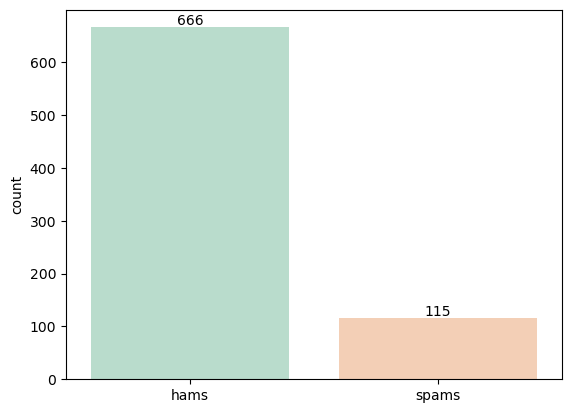

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x=data["Label"], palette=("Pastel2"))
abs_values = data["Label"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_xticklabels(['hams', 'spams'])

plt.xlabel(None)
plt.show()

In [200]:
emails = data["Body"]

# Text preprocessing
Here I'm removing unneeded characters, like HTML tags, emails etc.

In [201]:
import re

# remove emails
emails = [re.sub('\S*@\S*\s?', '', text) for text in emails]
# remove url links
emails = [re.sub('\S*(http[s]?://|www\.)\S*', '', text) for text in emails]
# remove HTML tags
emails = [re.sub(r"'<.*?>'", "", text) for text in emails]
# remove special characters and numbers
emails = [re.sub("[^a-zA-Z]"," ",text) for text in emails]
# remove too short (2- characters) words
emails = [re.sub(r"\b\w{1,2}\b", "",text) for text in emails]
# and too long (17+ characters) 
emails = [re.sub(r"\b\w{17,}\b", "",text) for text in emails]
# remove multiple spaces
emails = [re.sub(' +', ' ', text).strip() for text in emails]
# lower
emails = [text.lower() for text in emails]

emails[0]

'subject minority languages context minority languages context diversity and standardisation congress held chur switzerland september provisional program themes addressed the congress the aim the congress stimulate the study and discussion contextual dimensions within which minority languages are spoken shared and taught the congress will provide forum for the exchange and discussion descriptive and comparative reports from variety regional and national settings including those switzerland the contexts within which minority languages evolve can described from differing points view along continuum between two opposing poles one end the continuum lay attempts achieve stability and homogeneity which are usually articulated through projects aiming the planning and normalisation minority languages order present these codes having equal status adjacent majority languages the other end the continuum find destabilisation and heterogeneity observable points contact and overlap between minority 

## Tokenization and lemmatization
Tokenization: [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition) (page 180)
<ul>
    <li>one-hot encoding of tokens</li>
    <li>token embedding</li>
</ul>
For more, look at <i>Deep Learning</i> section below.

We can choose between stemming or lemmatization - lemmatizators are slower, but change tenses and nouns. <br/>
https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

Firstly I used NLTK lemmatization, but it is very slow on my computer, so I tried SpaCy instead (https://spacy.io).

In [202]:
custom_stopwords = ['subject', 'empty', 'email', 'mail', 'enron', 'linux', 'list', 'get', 'http', 'vince', 'com', 'org', 'www', 'etc', 'ect', 'edu', 'hou', 'would', 'need']

### Using NLTK
Everything is very slow, but still works.

In [203]:
# tokenization

# import nltk
# emails = [nltk.word_tokenize(text) for text in emails]
# emails[0][:15]

In [204]:
# remove stopwords

# stopwords = nltk.corpus.stopwords.words("english")
# stopwords.extend(custom_stopwords)
# emails = [[word for word in text if word not in stopwords] for text in emails]
# emails[0][:15]

In [205]:
# lemmatization
# very long

# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import wordnet

# def get_wordnet_pos(word):
#     """Map POS tag to first character lemmatize() accepts"""
#     tag_dict = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}
#     tag = nltk.pos_tag([word])[0][1][0].upper()
#     return tag_dict.get(tag, wordnet.NOUN)

# nltk.data.path.append('/kaggle/input/corpora/')
# lemmatizer = WordNetLemmatizer()
# emails = [[lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in text] for text in emails]
# emails[0][:15]

### Using SpaCy
https://stackoverflow.com/a/75215495

In [206]:
import spacy

nlp = spacy.load("en_core_web_sm")

# remove stop words
for word in custom_stopwords:
    nlp.vocab[word].is_stop = True

In [207]:
# lemmatization
emails = [[token.lemma_ for token in nlp(text) if not token.is_stop] for text in emails]
emails[0][:15]

['minority',
 'language',
 'context',
 'minority',
 'language',
 'context',
 'diversity',
 'standardisation',
 'congress',
 'hold',
 'chur',
 'switzerland',
 'september',
 'provisional',
 'program']

# Feature extraction 
Creating a vector of features (words) for each email. <br />
OpenAI:
> Both CountVectorizer and TF-IDF (Term Frequency-Inverse Document Frequency) from scikit-learn are popular techniques for feature extraction in text data like emails, and each has its own merits.
> 
> CountVectorizer creates a Bag of Words (BoW) model, where the features are the counts of each word in the document. This method is simple and easy to implement but can give more importance to words that appear frequently, regardless of their significance in distinguishing spam from non-spam emails.
> 
> TF-IDF, on the other hand, takes into account not only the frequency of a word in a document but also its inverse frequency across all documents. This means that words that are common across all emails will receive lower weights, while words that are unique to specific emails will receive higher weights. This can be advantageous for spam detection, as spam emails often contain specific words or phrases that are less common in legitimate emails.
> 
> In general, TF-IDF tends to work better than CountVectorizer for spam detection because it can better capture the importance of different words. However, the choice between the two methods will depend on the specific characteristics of the dataset and the problem you're trying to solve. It's a good idea to experiment with both techniques and evaluate their performance on your dataset using cross-validation or a separate validation set. This will help you determine which method works best for your particular spam detection task.

In [208]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

# ngram_range=(1,2) means that the model will consider bigrams too
# min_df=0.003 means that the model will not consider rare words
count_vectorizer = CountVectorizer(max_features=25000, ngram_range=(1,1), min_df=0.003, max_df=0.9)
bag_of_words = count_vectorizer.fit_transform([" ".join(text) for text in emails]).toarray()
print(bag_of_words.shape)
count_vectorizer.get_feature_names_out()[:10] # first 10 in alphabetical order

(781, 6229)


array(['aachen', 'aan', 'aaron', 'abandon', 'abbreviate', 'abd',
       'abduction', 'abe', 'abeille', 'aberystwyth'], dtype=object)

In [209]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer = TfidfVectorizer(max_features=25000, ngram_range=(1,1), min_df=0.003, max_df=0.9)
tf_idf = tf_vectorizer.fit_transform([" ".join(text) for text in emails]).toarray()
print(tf_idf.shape)
tf_vectorizer.get_feature_names_out()[:10]

(781, 6229)


array(['aachen', 'aan', 'aaron', 'abandon', 'abbreviate', 'abd',
       'abduction', 'abe', 'abeille', 'aberystwyth'], dtype=object)

# Word embeddings
A word embedding is a vector, that tries to capture "meaning" of a word/sentence/document etc... Some of the algorithms are provided by Word2Vec, GloVe. I used one provided by SpaCy.

## Word2vec
http://jalammar.github.io/illustrated-word2vec/<br/>
https://www.freecodecamp.org/news/how-to-get-started-with-word2vec-and-then-how-to-make-it-work-d0a2fca9dad3/<br/>
https://www.advancinganalytics.co.uk/blog/2022/7/22/using-machine-learning-to-perform-text-clustering<br/>
https://aclanthology.org/I17-2006.pdf#:~:text=More%20specically%2C%20we%20show%20that%20the%20number%20of,in%20degradation%20of%20quality%20of%20learned%20word%20embeddings.
### Using Gensim
Not working yet.<br/>

In [210]:
from gensim.models import Word2Vec

word2vec_model = Word2Vec(emails, vector_size=1000, min_count=1, workers=4)

In [211]:
def get_email_vector(i):
    return np.mean(np.array(word2vec_model.wv[emails[i]]), axis=0)

In [212]:
from scipy import spatial

first_ham = np.where(data['Label'] == 0)[0][0]
second_ham = np.where(data['Label'] == 0)[0][1]
first_spam = np.where(data['Label'] == 1)[0][0]

sim = 1 - spatial.distance.cosine(get_email_vector(first_ham), get_email_vector(second_ham))
print(sim)

sim = 1 - spatial.distance.cosine(get_email_vector(first_ham), get_email_vector(first_spam))
print(sim)

0.9996016621589661
0.9986112117767334


### Using SpaCy
Also check [sense2vec](http://https://github.com/explosion/sense2vec)

In [213]:
nlp = spacy.blank("en")
nlp.from_disk('/kaggle/input/en-core-web-lg/en_core_web_lg/en_core_web_lg-3.6.0')

Just some playing.<br/>
https://www.kaggle.com/code/hassanamin/learning-spacy-basics

In [214]:
# Document similarity
doc1 = nlp("I like guinea pigs")
doc2 = nlp("Apple is looking at buying U.K. startup for $1 billion")
print(doc1.similarity(doc2))

doc1 = nlp("I like guinea pigs")
doc2 = nlp("I like cats")
print(doc1.similarity(doc2))

# Compare two tokens
doc = nlp("I like vegetables and buckwheat.")
token1 = doc[2]
token2 = doc[4]
print("Token 1, Token 2: ",token1,", ",token2)
print(token1.similarity(token2))

# Compare a document with a token
doc = nlp("king")
token = nlp("prince")[0]
print(doc.similarity(token))

-0.06765623693853647
0.9352704992293962
Token 1, Token 2:  vegetables ,  buckwheat
0.647589921951294
0.7827692319745013


Creating vectors for each email. We take a vector for each word from email, and finding the average vector for a whole email.

In [215]:
email_embeddings = []
for email in emails:
    spacy_doc = nlp(' '.join(email))
    avg_vector = sum([token.vector for token in spacy_doc]) / len(email)
    email_embeddings.append(avg_vector)

More playing.

In [216]:
from sklearn.metrics.pairwise import cosine_similarity

ham1 = np.where(data['Label'] == 0)[0][0]
ham2 = np.where(data['Label'] == 0)[0][1]
spam = np.where(data['Label'] == 1)[0][0]

print("\nHam 1:", data.iloc[ham1]['Body'][:500])
print("\nHam 2:", data.iloc[ham2]['Body'][:500])
print("\nSpam:", data.iloc[spam]['Body'][:500])

ham1_doc = nlp(' '.join(emails[ham1]))
ham2_doc = nlp(' '.join(emails[ham2]))
spam_doc = nlp(' '.join(emails[spam]))
print("Similarity between ham 1 and ham 2:", ham1_doc.similarity(ham2_doc))
print("Similarity between ham 1 and spam:", ham1_doc.similarity(spam_doc))
print("Similarity between ham 2 and spam:", ham2_doc.similarity(spam_doc))


Ham 1: Subject: minority languages in context
 
 * * * * * * * * * * * * * * * * * * * * minority languages in context diversity and standardisation congress to be held in chur ( switzerland ) , 21st - 23rd september 1998 provisional program themes addressed by the congress the aim of the congress is to stimulate the study and discussion of contextual dimensions within which minority languages are spoken , shared and taught . the congress will provide a forum for the exchange and discussion of descript

Ham 2: Subject: query : tagalog and other philippine informants
 
 are there any native speakers of tagalog or other philippine languages receiving this who would be willing to answer some questions about their usage ?


Spam: Subject: seasons greetings from santa !
 
 santa at onlinenow wishes you happy holidays , merry christmas and a happy , prosperous new year . onlinenow world wide directories http : / / onlinenow . net / frames /

Similarity between ham 1 and ham 2: 0.82687587824

# Word cloud
Here are word clouds for spams and hams with the most frequent words, created with TF-IDF vectorizer.

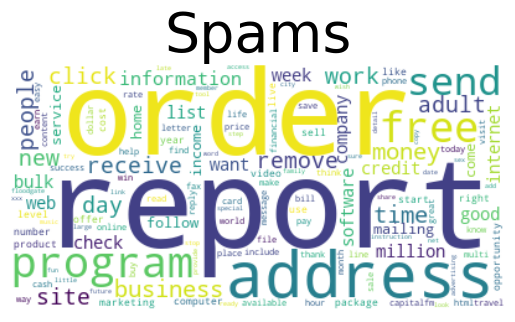

In [217]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

data['Tokens'] = emails

# spams
spams = data.loc[data['Label'] == 1, ['Tokens']]
spam_x = tf_vectorizer.fit_transform([" ".join(text) for text in spams['Tokens']]).toarray()

df = pd.DataFrame(spam_x.tolist(), columns=tf_vectorizer.get_feature_names_out())
df.head(10)

wordcloud = WordCloud(background_color='white', max_words=200,
                      stopwords = STOPWORDS, collocations=True).generate_from_frequencies(df.T.sum(axis=1))
plt.title('Spams', fontsize = 40)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

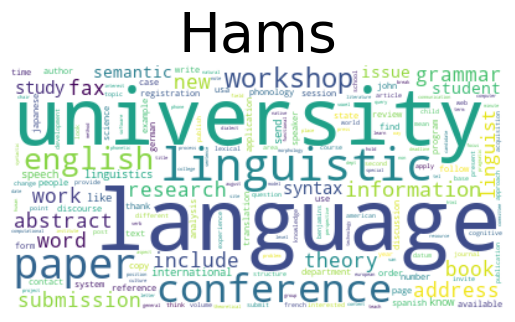

In [218]:
# hams
hams = data.loc[data['Label'] == 0, ['Tokens']]
ham_x = tf_vectorizer.fit_transform([" ".join(text) for text in hams['Tokens']]).toarray()

df = pd.DataFrame(ham_x.tolist(), columns=tf_vectorizer.get_feature_names_out())

wordcloud = WordCloud(background_color='white', max_words=200,
                      stopwords = STOPWORDS, collocations=True).generate_from_frequencies(df.T.sum(axis=1))
plt.title('Hams', fontsize = 40)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Split to train and test data
The split is needed for supervised algorithms and supervised deep learning. I'm going to expriment with supervised algorithms, trying each on CounVectorizer and on TF-IDF.

In [219]:
from sklearn.model_selection import train_test_split

# split to train and test data for CountVectorizer
x_train,x_test,y_train,y_test = train_test_split(bag_of_words, np.asarray(data["Label"]), random_state=42, test_size=0.2)

# split to train and test data for TF-IDF
x2_train,x2_test,y2_train,y2_test = train_test_split(tf_idf, np.asarray(data["Label"]), random_state=42, test_size=0.2)

# split to train and test data for embeddings
x3_train,x3_test,y3_train,y3_test = train_test_split(email_embeddings, np.asarray(data["Label"]), random_state=42, test_size=0.2)

# Classification algorithms (supervised)
https://towardsdatascience.com/top-10-binary-classification-algorithms-a-beginners-guide-feeacbd7a3e2 <br />
As we can see, the worse results are given by Naive Bayes with CountVectorizer. Other algorithms are dealing more or less well. The best results are given by VotingClassifier. <br />
We see that embeddings indeed performs better.
## Evaluation metrics:
**Accuracy** = (True Positives + True Negatives) / (True Positives + False Positives + True Negatives + False Negatives) <br />
Accuracy measures the proportion of correct predictions made by the model out of the total number of predictions.


**Precision** = True Positives / (True Positives + False Positives) <br />
Precision measures the proportion of true positive predictions out of all the positive predictions made by the model.


**Recall** = True Positives / (True Positives + False Negatives) <br />
Recall measures the proportion of true positive predictions to the number of actual positives (true positives + false negatives).


**F1 Score** = 2 * (Precision * Recall) / (Precision + Recall) <br />
An F1 score reaches its best value at 1 (perfect precision and recall) and its worst value at 0.

In [148]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

def print_stats(algorithm, title, x_train_data, x_test_data, y_train_data, y_test_data): 
    
    # actually perform classification
    y_pred = algorithm.predict(x_test_data) 

    # Thus in binary classification, the count of 
    # true negatives is 0,0 
    # false negatives is 1,0
    # true positives is 1,1
    # false positives is 0,1
    conf = confusion_matrix(y_pred=y_pred,y_true=y_test_data)

    plt.title(title)
    ax= plt.subplot()
    sns.heatmap(conf, annot=True, fmt="", linewidths=2, cmap="Greens")
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Real');
    ax.xaxis.set_ticklabels(['Ham', 'Spam']); 
    ax.yaxis.set_ticklabels(['Ham', 'Spam']);
    plt.show()
    
    tn, fp, fn, tp = conf.ravel()
    print("Accuracy on training data: {:.2f}%".format(100 * algorithm.score(x_train_data,y_train_data)))
    print("Accuracy on testing data: {:.2f}%".format(100 * algorithm.score(x_test_data,y_test_data)))
    print("Precision: {:.2f}%".format(100 * precision_score(y_pred, y_test_data)))
    print("Recall: {:.2f}%".format(100 * recall_score(y_pred, y_test_data)))
    print("F1 Score: {:.2f}%".format(100 * f1_score(y_pred, y_test_data)))

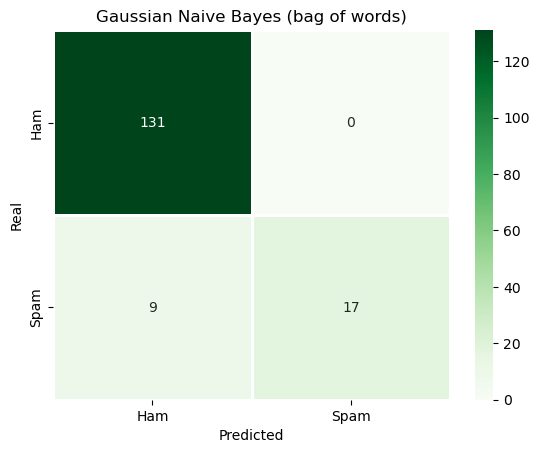

Accuracy on training data: 99.84%
Accuracy on testing data: 94.27%
Precision: 65.38%
Recall: 100.00%
F1 Score: 79.07%


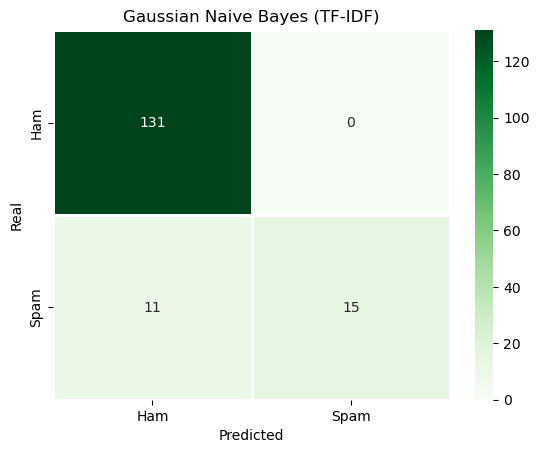

Accuracy on training data: 99.84%
Accuracy on testing data: 92.99%
Precision: 57.69%
Recall: 100.00%
F1 Score: 73.17%


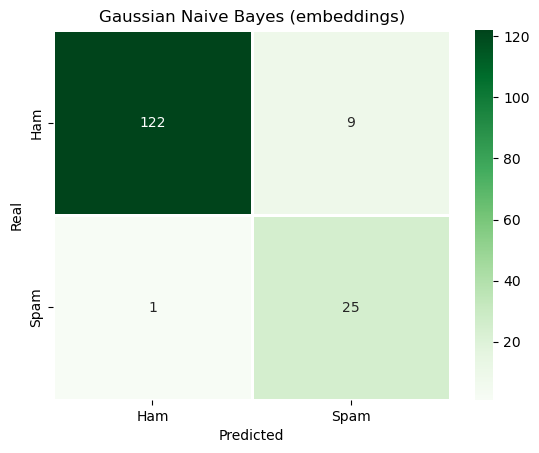

Accuracy on training data: 95.51%
Accuracy on testing data: 93.63%
Precision: 96.15%
Recall: 73.53%
F1 Score: 83.33%


In [149]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train,y_train)
print_stats(NB,"Gaussian Naive Bayes (bag of words)",x_train,x_test,y_train,y_test)

NB2 = GaussianNB()
NB2.fit(x2_train,y2_train)
print_stats(NB2,"Gaussian Naive Bayes (TF-IDF)",x2_train,x2_test,y2_train,y2_test)

NB3 = GaussianNB()
NB3.fit(x3_train,y3_train)
print_stats(NB3,"Gaussian Naive Bayes (embeddings)",x3_train,x3_test,y3_train,y3_test)

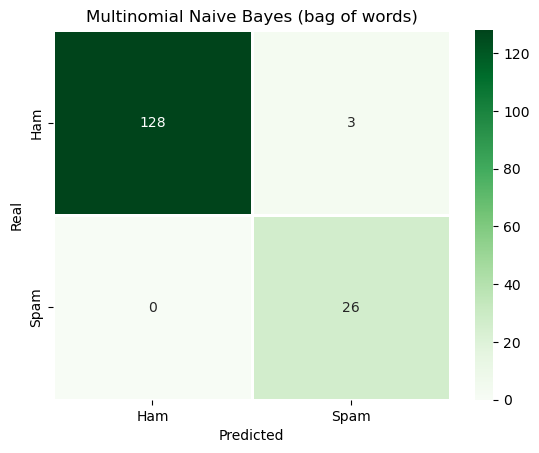

Accuracy on training data: 99.52%
Accuracy on testing data: 98.09%
Precision: 100.00%
Recall: 89.66%
F1 Score: 94.55%


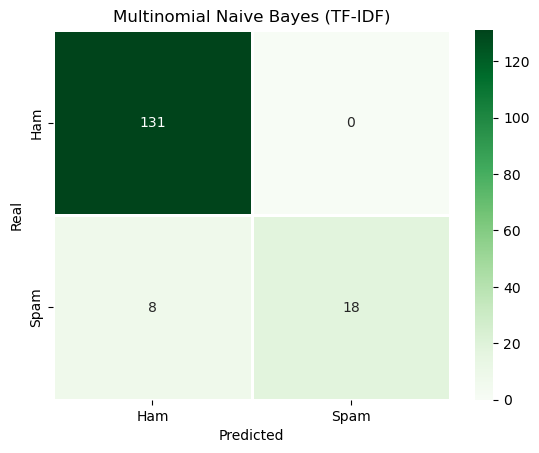

Accuracy on training data: 97.28%
Accuracy on testing data: 94.90%
Precision: 69.23%
Recall: 100.00%
F1 Score: 81.82%


In [150]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(x_train,y_train)
print_stats(MNB,"Multinomial Naive Bayes (bag of words)",x_train,x_test,y_train,y_test)

MNB2 = MultinomialNB()
MNB2.fit(x2_train,y2_train)
print_stats(MNB2,"Multinomial Naive Bayes (TF-IDF)",x2_train,x2_test,y2_train,y2_test)

# MNB3 = MultinomialNB()
# MNB3.fit(x3_train,y3_train)
# print_stats(MNB3,"Multinomial Naive Bayes (embeddings)",x3_train,x3_test,y3_train,y3_test)

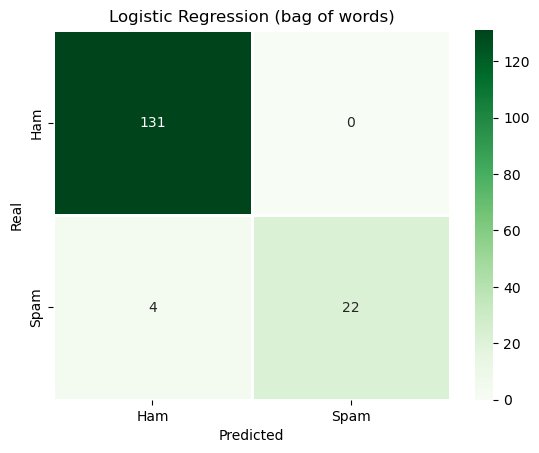

Accuracy on training data: 100.00%
Accuracy on testing data: 97.45%
Precision: 84.62%
Recall: 100.00%
F1 Score: 91.67%


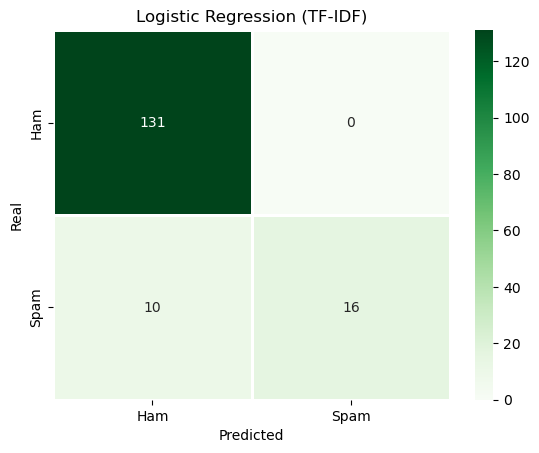

Accuracy on training data: 96.15%
Accuracy on testing data: 93.63%
Precision: 61.54%
Recall: 100.00%
F1 Score: 76.19%


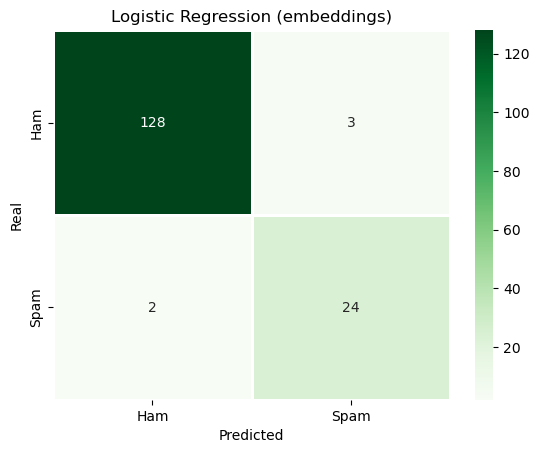

Accuracy on training data: 100.00%
Accuracy on testing data: 96.82%
Precision: 92.31%
Recall: 88.89%
F1 Score: 90.57%


In [151]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(x_train, y_train)
print_stats(LR,"Logistic Regression (bag of words)",x_train,x_test,y_train,y_test)

LR2 = LogisticRegression(max_iter=1000)
LR2.fit(x2_train,y2_train)
print_stats(LR2,"Logistic Regression (TF-IDF)",x2_train,x2_test,y2_train,y2_test)

LR3 = LogisticRegression(max_iter=1000)
LR3.fit(x3_train,y3_train)
print_stats(LR3,"Logistic Regression (embeddings)",x3_train,x3_test,y3_train,y3_test)

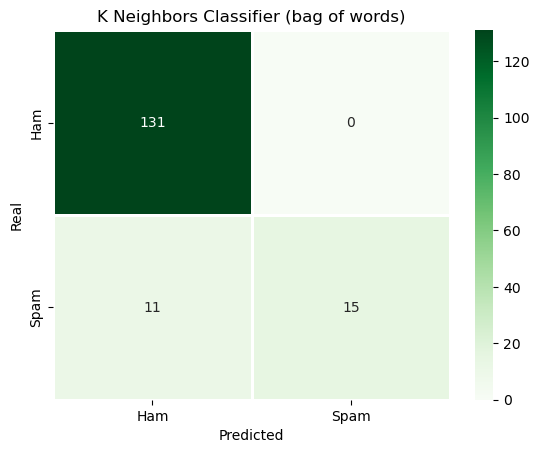

Accuracy on training data: 96.79%
Accuracy on testing data: 92.99%
Precision: 57.69%
Recall: 100.00%
F1 Score: 73.17%


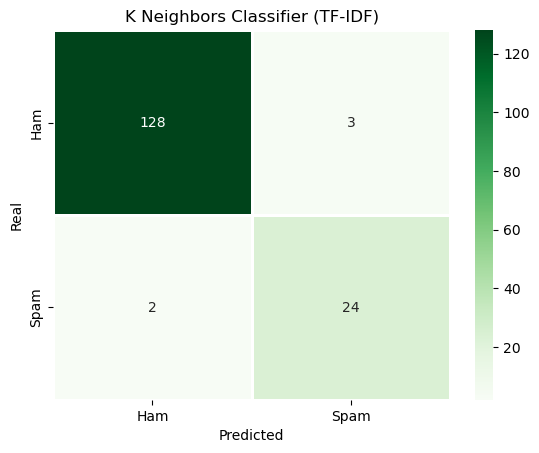

Accuracy on training data: 98.88%
Accuracy on testing data: 96.82%
Precision: 92.31%
Recall: 88.89%
F1 Score: 90.57%


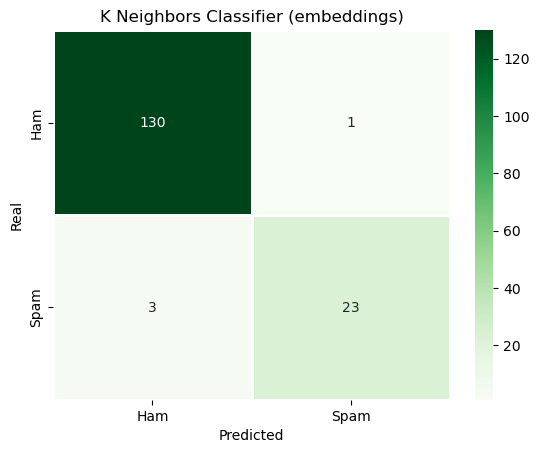

Accuracy on training data: 98.88%
Accuracy on testing data: 97.45%
Precision: 88.46%
Recall: 95.83%
F1 Score: 92.00%


In [152]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
KNN.fit(x_train, y_train)
print_stats(KNN,"K Neighbors Classifier (bag of words)",x_train,x_test,y_train,y_test)

KNN2 = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
KNN2.fit(x2_train, y2_train)
print_stats(KNN2,"K Neighbors Classifier (TF-IDF)",x2_train,x2_test,y2_train,y2_test)

KNN3 = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
KNN3.fit(x3_train, y3_train)
print_stats(KNN3,"K Neighbors Classifier (embeddings)",x3_train,x3_test,y3_train,y3_test)

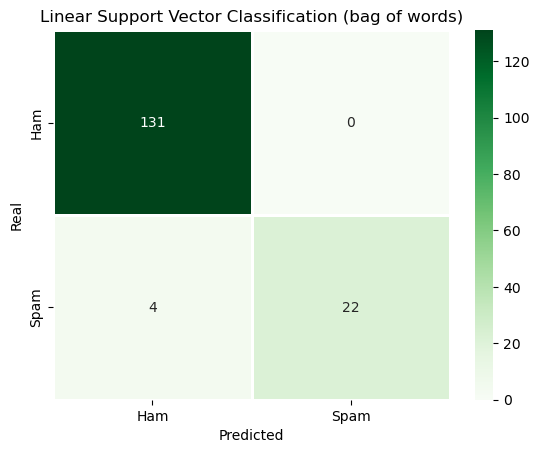

Accuracy on training data: 99.04%
Accuracy on testing data: 97.45%
Precision: 84.62%
Recall: 100.00%
F1 Score: 91.67%


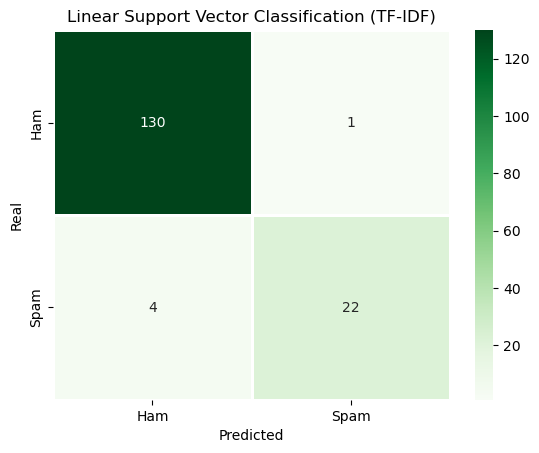

Accuracy on training data: 100.00%
Accuracy on testing data: 96.82%
Precision: 84.62%
Recall: 95.65%
F1 Score: 89.80%


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


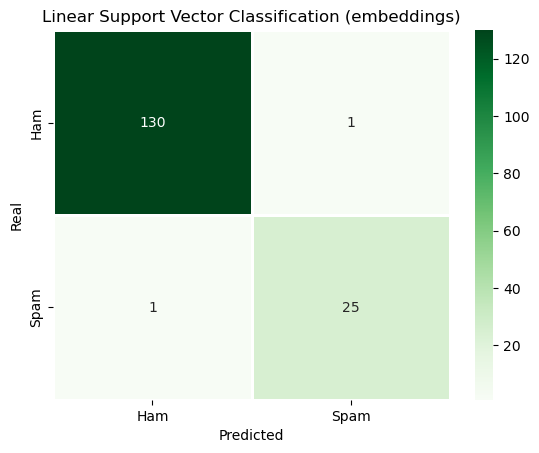

Accuracy on training data: 100.00%
Accuracy on testing data: 98.73%
Precision: 96.15%
Recall: 96.15%
F1 Score: 96.15%


In [153]:
# Linear Support Vector Classification
from sklearn.svm import LinearSVC

SVC = LinearSVC(C=0.001)
SVC.fit(x_train, y_train)
print_stats(SVC,"Linear Support Vector Classification (bag of words)",x_train,x_test,y_train,y_test)

SVC2 = LinearSVC(C=30)
SVC2.fit(x2_train,y2_train)
print_stats(SVC2,"Linear Support Vector Classification (TF-IDF)",x2_train,x2_test,y2_train,y2_test)

SVC3 = LinearSVC(C=10)
SVC3.fit(x3_train,y3_train)
print_stats(SVC3,"Linear Support Vector Classification (embeddings)",x3_train,x3_test,y3_train,y3_test)

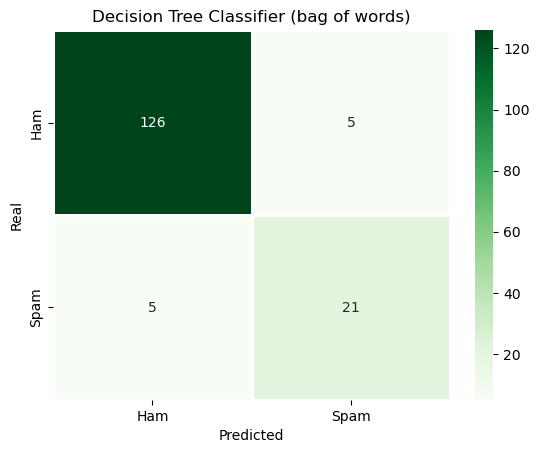

Accuracy on training data: 100.00%
Accuracy on testing data: 93.63%
Precision: 80.77%
Recall: 80.77%
F1 Score: 80.77%


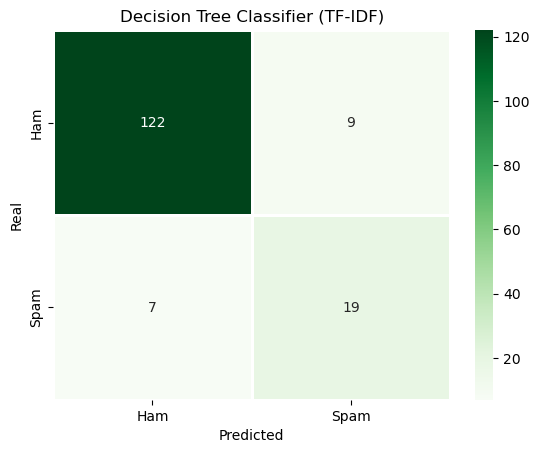

Accuracy on training data: 100.00%
Accuracy on testing data: 89.81%
Precision: 73.08%
Recall: 67.86%
F1 Score: 70.37%


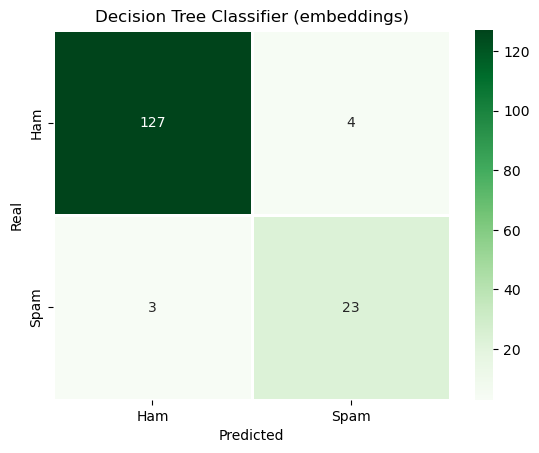

Accuracy on training data: 100.00%
Accuracy on testing data: 95.54%
Precision: 88.46%
Recall: 85.19%
F1 Score: 86.79%


In [154]:
from sklearn.tree import DecisionTreeClassifier

CLF = DecisionTreeClassifier()
CLF.fit(x_train, y_train)
print_stats(CLF,"Decision Tree Classifier (bag of words)",x_train,x_test,y_train,y_test)

CLF2 = DecisionTreeClassifier()
CLF2.fit(x2_train, y2_train)
print_stats(CLF2,"Decision Tree Classifier (TF-IDF)",x2_train,x2_test,y2_train,y2_test)

CLF3 = DecisionTreeClassifier()
CLF3.fit(x3_train, y3_train)
print_stats(CLF3,"Decision Tree Classifier (embeddings)",x3_train,x3_test,y3_train,y3_test)

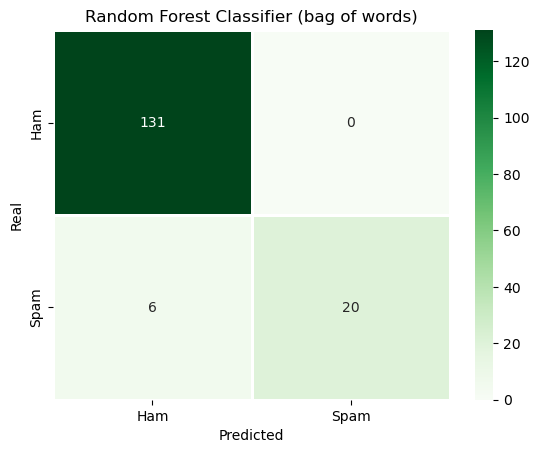

Accuracy on training data: 100.00%
Accuracy on testing data: 96.18%
Precision: 76.92%
Recall: 100.00%
F1 Score: 86.96%


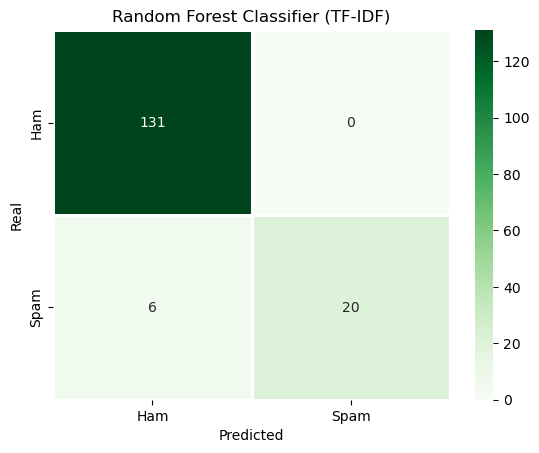

Accuracy on training data: 100.00%
Accuracy on testing data: 96.18%
Precision: 76.92%
Recall: 100.00%
F1 Score: 86.96%


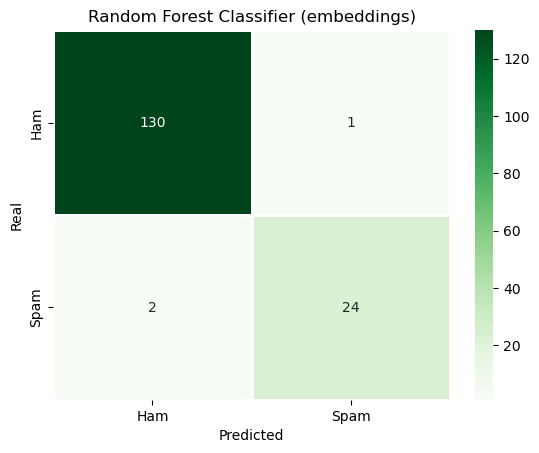

Accuracy on training data: 100.00%
Accuracy on testing data: 98.09%
Precision: 92.31%
Recall: 96.00%
F1 Score: 94.12%


In [155]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
RF = RandomForestClassifier(n_estimators=100, max_depth=50)
RF.fit(x_train, y_train)
print_stats(RF,"Random Forest Classifier (bag of words)",x_train,x_test,y_train,y_test)

RF2 = RandomForestClassifier(n_estimators=100, max_depth=50)
RF2.fit(x2_train,y2_train)
print_stats(RF2,"Random Forest Classifier (TF-IDF)",x2_train,x2_test,y2_train,y2_test)

RF3 = RandomForestClassifier(n_estimators=100, max_depth=50)
RF3.fit(x3_train,y3_train)
print_stats(RF3,"Random Forest Classifier (embeddings)",x3_train,x3_test,y3_train,y3_test)

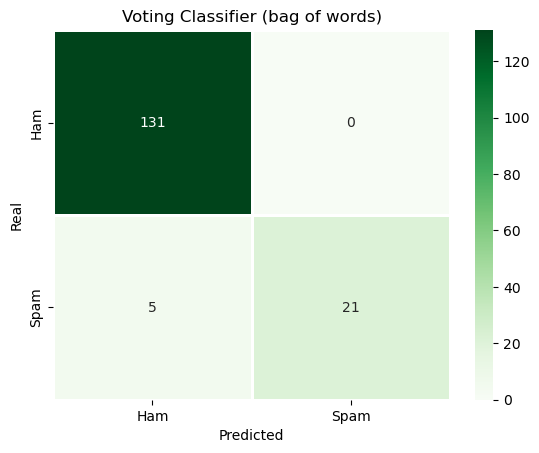

Accuracy on training data: 100.00%
Accuracy on testing data: 96.82%
Precision: 80.77%
Recall: 100.00%
F1 Score: 89.36%


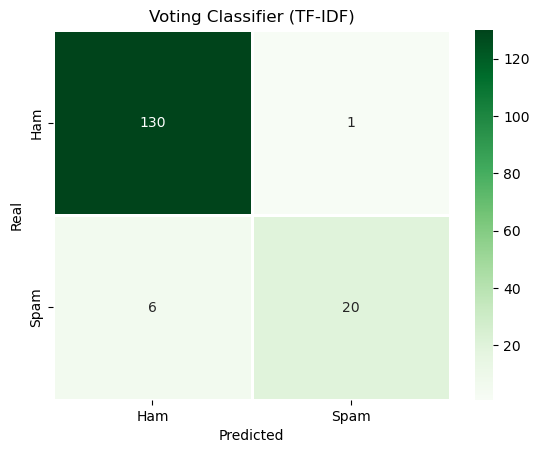

Accuracy on training data: 100.00%
Accuracy on testing data: 95.54%
Precision: 76.92%
Recall: 95.24%
F1 Score: 85.11%


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


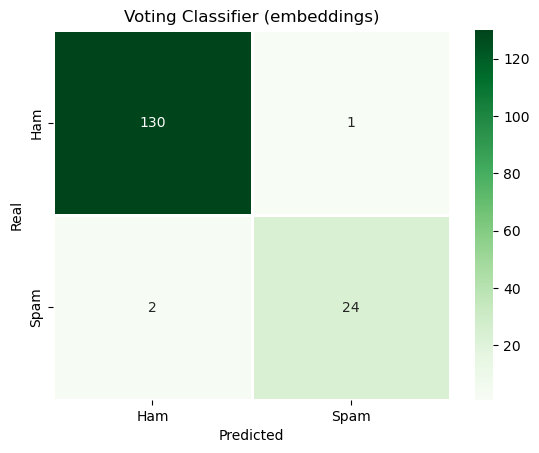

Accuracy on training data: 100.00%
Accuracy on testing data: 98.09%
Precision: 92.31%
Recall: 96.00%
F1 Score: 94.12%


In [156]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

EVC = VotingClassifier(estimators=[('LR',LR),('RF',RF),('SVC',SVC),('KNN', KNN),('CLF', CLF)], voting='hard')
EVC.fit(x_train, y_train)
print_stats(EVC,"Voting Classifier (bag of words)",x_train,x_test,y_train,y_test)

EVC2 = VotingClassifier(estimators=[('LR',LR2),('RF',RF2),('SVC',SVC2),('KNN', KNN2),('CLF', CLF2)], voting='hard')
EVC2.fit(x2_train,y2_train)
print_stats(EVC2,"Voting Classifier (TF-IDF)",x2_train,x2_test,y2_train,y2_test)

EVC3 = VotingClassifier(estimators=[('LR',LR3),('RF',RF3),('SVC',SVC3),('KNN2', KNN3),('CLF2', CLF3)], voting='hard')
EVC3.fit(x3_train,y3_train)
print_stats(EVC3,"Voting Classifier (embeddings)",x3_train,x3_test,y3_train,y3_test)

# Unsupervised algorithms 
I'm not sure if it's possible to classify emails on spams and hams using unsupervised algorithms. <br />
But we can use LDA (or NMF) for extracting the topics, or K-Means for finding clusters, which can be helpful. <br />
## Topic modelling (LDA and NMF)
https://www.dataknowsall.com/topicmodels.html <br />
https://github.com/ashishsalunkhe/Topic-Modeling-using-LDA-and-K-Means-Clustering <br />
https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2 <br />
https://towardsdatascience.com/the-ultimate-guide-to-clustering-algorithms-and-topic-modeling-3a65129df324 <br />
https://towardsdatascience.com/basic-nlp-on-the-texts-of-harry-potter-topic-modeling-with-latent-dirichlet-allocation-f3c00f77b0f5 <br />
We can choose between Sklearn LDA and Gensim LDA. I chosed the Sklearn's for now, since it's faster and gives better results. https://medium.com/@benzgreer/sklearn-lda-vs-gensim-lda-691a9f2e9ab7 <br />
There's an alternative for LDA, NMF. So I tried them both. <br />
https://medium.com/ml2vec/topic-modeling-is-an-unsupervised-learning-approach-to-clustering-documents-to-discover-topics-fdfbf30e27df

In [38]:
def explore_topics(algorithm, chosen_vectorizer):
    results_dict = {}
    top_n_words = 15
    feature_names = chosen_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(algorithm.components_):
        top_n_words = 15
        top_words = [feature_names[i] for i in topic.argsort()[-top_n_words:]]
        results_dict[f'Topic {topic_idx}'] = top_words
    return pd.DataFrame.from_dict(results_dict)

In [39]:
from sklearn.decomposition import LatentDirichletAllocation

def lda_features(model, n_components):
    lda = LatentDirichletAllocation(n_components=n_components, random_state=42)
    features = lda.fit_transform(model)
    return features, lda

It's better first to choose the best number of topics with eiter perplexity, or coherence. <br />
* **Perplexity**: Lower the perplexity better the model.
* **Coherence**: Higher the topic coherence, the topic is more human interpretable. 

In [40]:
def elbow_method_lda(model, max_components, title):
    ks = range(1, max_components)
    perplexities = []
    for k in ks:
        lda = LatentDirichletAllocation(n_components=k, random_state=42)
        # Fit model to samples
        lda.fit(model)
        # Append the perplexity
        perplexities.append(lda.perplexity(model))

    # Plot 
    plt.plot(ks, perplexities, '-o')
    plt.title(title)
    plt.xlabel('number of topics')
    plt.ylabel('perplexity')
    plt.xticks(ks)
    plt.show()

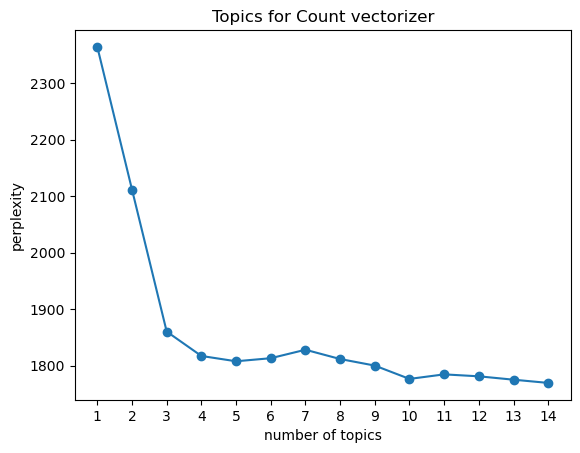

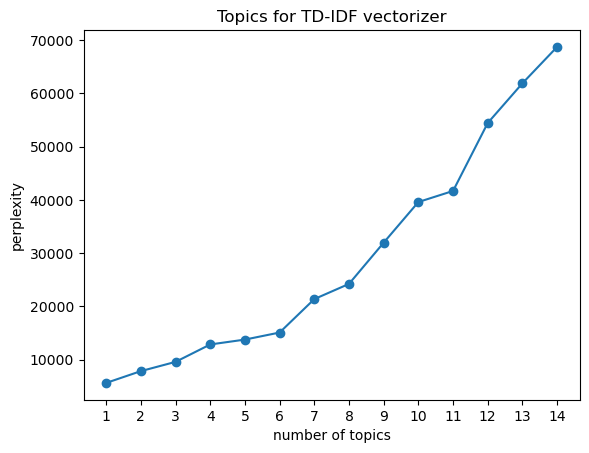

In [41]:
# very long
elbow_method_lda(bag_of_words, 15, "Topics for Count vectorizer")
elbow_method_lda(tf_idf, 15, "Topics for TD-IDF vectorizer")

In [42]:
lda_features_x, lda_x = lda_features(bag_of_words, 3)
explore_topics(lda_x, count_vectorizer)

,Topic 0,Topic 1,Topic 2
0,system,university,business
1,abstract,form,day
2,session,syntax,internet
3,submission,work,new
4,fax,feature,people
5,address,grammar,time
6,include,example,work
7,research,like,receive
8,information,case,money
9,linguistic,theory,send


In [43]:
lda_features_x2, lda_x2 = lda_features(tf_idf, 3)
explore_topics(lda_x2, tf_vectorizer)

,Topic 0,Topic 1,Topic 2
0,modlang,learning,ernst
1,investigation,granada,hugo
2,leadership,felix,competency
3,informal,filename,era
4,prosodically,al,kee
5,protasis,prepayment,primitive
6,acoustic,instal,pinker
7,protolanguage,cnrs,congres
8,categorize,loria,linguis
9,figurative,century,bounce


In [44]:
from sklearn.decomposition import NMF

nmf  = NMF(n_components = 3)
nmf.fit_transform(bag_of_words)
explore_topics(nmf, count_vectorizer)

/opt/conda/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


,Topic 0,Topic 1,Topic 2
0,day,submission,html
1,start,word,site
2,level,research,pre
3,follow,english,service
4,time,include,access
5,business,speech,company
6,people,session,agent
7,send,system,unlimited
8,address,workshop,htm
9,money,conference,cgi


In [45]:
# Gensim LDA and coherence

## The process
![process](https://miro.medium.com/v2/resize:fit:720/format:webp/1*2W8wMBiGEdHBCevqZ0d79g.png)
<br/>(taken from https://towardsdatascience.com/a-friendly-introduction-to-text-clustering-fa996bcefd04)

## Clustering metrics
* **Davies-Bouldin Index**: a lower DBI value indicates better clustering performance, as it signifies less scatter within clusters and more separation between them.
* **Silhouette Score**: a value that ranges from -1 to 1; a higher silhouette score indicates that the data point is well-matched to its own cluster and poorly matched to other clusters.
* **Calinski-Harabasz**: to be added

In [46]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

def print_clustering_metrics(model, labels):
    db_index = davies_bouldin_score(model, labels)
    sil_score = silhouette_score(model,labels)
    print("Davies-Bouldin Index: {:.5f}".format(db_index))
    print("Silhouette Score: {:.5f}".format(sil_score))

In [47]:
def show_plot_with_clusters(labels):
    # Count the number of elements in each cluster
    unique_labels, counts = np.unique(labels, return_counts=True)

    # Create a DataFrame from the unique labels and counts
    data = pd.DataFrame({'Cluster ID': unique_labels, 'Number of Elements': counts})

    # Plotting the bar chart
    ax = sns.barplot(x='Cluster ID', y='Number of Elements', data=data, palette=("Pastel1"))
    plt.xlabel('Cluster ID')
    plt.ylabel('Number of Elements')
    plt.title('Number of Elements in Each Cluster')

    # Add numbers on top of bars
    for i, count in enumerate(counts):
        ax.text(i, count+0.5, str(count), ha='center')

    plt.show()

In [48]:
def show_emails_from_clusters(labels):
    numpy_labels = np.array(labels)
    for label in np.unique(labels):
        print("==================================")
        print("Several emails from the cluster", label)
        print("==================================")
        for i in range(0, 5):
            length = len(np.where(numpy_labels == label)[0])
            if i < length:
                pos = np.where(numpy_labels == label)[0][i]
                print(data.iloc[pos]['Body'][:1000])
                print('----------------------------------')

## StandardScaler and PCA

Using **StandardScaler** ensures that all features have a mean of 0 and a standard deviation of 1. <br />
**PCA** can help reduce noise. <br />
StandardScaler and PCA can be useful when working with KMeans and DBSCAN because these algorithms are sensitive to the scale of the input features and the dimensionality of the data. <br />
But I'm not sure, if they're needed.

In [49]:
# will leave them here for now

# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# scaler = StandardScaler()
# x2_scaled = scaler.fit_transform(x2)

# # initialize PCA with 2 components
# pca = PCA(n_components=2, random_state=42)
# pca_vecs = pca.fit_transform(x2_scaled)

## [t-SNE](https://lvdmaaten.github.io/tsne/)
Reducing to 2 dimensions for visualizing,

## K-Means (or MiniBatchKMeans)
We can choose between K-Means and MiniBatchKMeans, which is faster. But the results of K-Means seem more meaningful. <br />
https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py <br />
https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/ <br />
https://stackoverflow.com/a/69024239 <br/>
https://stackoverflow.com/a/27586132 <br />
https://www.dataknowsall.com/textclustering.html <br />
https://www.kaggle.com/code/naren3256/kmeans-clustering-and-cluster-visualization-in-3d/notebook <br />
https://medium.com/@jwbtmf/visualizing-data-using-k-means-clustering-unsupervised-machine-learning-8b59eabfcd3d <br />
For choosing the appropriate number of clusters, we can use Elbow method or Silhouette score. Let's use Elbow method.

In [50]:
# finding number of clusters with Elbow method
# very long
from sklearn.cluster import KMeans

def elbow_method(model, max_clusters, title):
    ks = range(1, max_clusters)
    inertias = []
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        # Fit model to samples
        kmeans.fit(model)
        # Append the inertia to the list of inertias
        inertias.append(kmeans.inertia_)

    # Plot ks vs inertias
    plt.plot(ks, inertias, '-o')
    plt.title(title)
    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

In [51]:
# actually KMeans
# using clusters, where there's some elbow.
def kmeans_with_clusters(n_clusters, model, chosen_vectorizer):
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(model)

    # top 15 words from each cluster
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = chosen_vectorizer.get_feature_names_out()
    results_dict = {}
    for i in range(n_clusters):
        terms_list = []
        for ind in order_centroids[i, :15]:  
            terms_list.append(terms[ind])
        results_dict[f'Cluster {i}'] = terms_list
    df_clusters = pd.DataFrame.from_dict(results_dict)
    return df_clusters

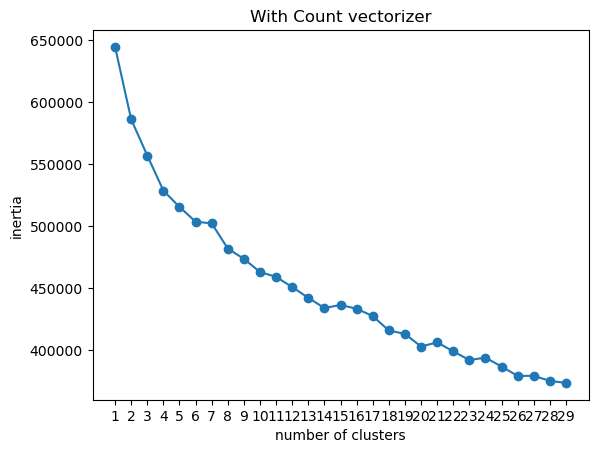

In [ ]:
elbow_method(bag_of_words, 30, "With Count vectorizer")
elbow_method(tf_idf, 30, "With TD-IDF vectorizer")

In [ ]:
# actually kmeans
# for count vectorizer
kmeans_with_clusters(8, bag_of_words, count_vectorizer)

In [ ]:
# for td-idf vectorizer
kmeans_with_clusters(7, tf_idf, tf_vectorizer)

In [ ]:
# the same, but using lda_features
elbow_method(lda_features_x, 15, "With Count vectorizer")
elbow_method(lda_features_x2, 15, "With TD-IDF vectorizer")

In [ ]:
kmeans_with_clusters(3, lda_features_x, count_vectorizer)

In [ ]:
kmeans_with_clusters(3, lda_features_x2, tf_vectorizer)

In [ ]:
# using email embeddings from SpaCy 
elbow_method(email_embeddings, 30, "With SpaCy embeddings")

In [ ]:
kmeans = KMeans(n_clusters=6)
labels = kmeans.fit_predict(email_embeddings)
print_clustering_metrics(email_embeddings, labels)

## DBSCAN

https://youtu.be/RDZUdRSDOok <br/>
https://dev.to/wmisingo/machine-learning-text-clustering-with-dbscan-399n <br/>
https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80 <br/>
https://www.advancinganalytics.co.uk/blog/2022/7/22/using-machine-learning-to-perform-text-clustering <br/>
https://www.kaggle.com/code/karthik3890/text-clustering

### Determining best eps
http://www.sefidian.com/2022/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/

In [ ]:
# choosing eps
from sklearn.neighbors import NearestNeighbors

min_samples = 70

# Compute the distance to the min_samples-th nearest neighbor for each point
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
nearest_neighbors.fit(email_embeddings)
distances, _ = nearest_neighbors.kneighbors(email_embeddings)

# Sort the distances
distances = np.sort(distances, axis=0)[:, min_samples-1]

# Plot the sorted distances
plt.plot(distances)
plt.xlabel('Sample index')
plt.ylabel('Distance to min_samples-th nearest neighbor')
plt.title('Elbow Method For Optimal eps')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=12, min_samples=min_samples)
dbscan.fit(email_embeddings)

clusters = np.unique(dbscan.labels_)
noise = np.sum(np.array(dbscan.labels_) == -1, axis=0)
print('Number of clusters: %d' % len(clusters))
print('Number of noise points: %d' % noise)
print_clustering_metrics(email_embeddings, dbscan.labels_)
show_plot_with_clusters(dbscan.labels_)
show_emails_from_clusters(dbscan.labels_)

## Agglomerative (hierarchical) clustering
https://www.javatpoint.com/hierarchical-clustering-in-machine-learning

In [ ]:
# finding the optimal number of clusters using the dendrogram  
# long
import scipy.cluster.hierarchy as shc  

dendro = shc.dendrogram(shc.linkage(email_embeddings, method="ward"))  
plt.title("Dendrogram Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Emails")  
plt.show()  

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 3)
ac_labels = ac.fit_predict(email_embeddings)
print_clustering_metrics(email_embeddings, ac_labels)
show_plot_with_clusters(ac_labels)
show_emails_from_clusters(ac_labels)

## Spectral clustering

In [ ]:
# from sklearn.cluster import SpectralClustering

# sc = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=0)
# sc_labels = sc.fit_predict(bag_of_words)
# print_clustering_metrics(bag_of_words, sc_labels)

## Gaussian Mixture Model
https://vitalflux.com/gaussian-mixture-models-what-are-they-when-to-use/ <br/>
https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4 (also determining appropriate number of clusters)<br/>
https://github.com/vlavorini/ClusterCardinality/blob/master/Cluster%20Cardinality.ipynb<br/>
https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms<br/>
https://stats.stackexchange.com/questions/349258/correct-number-of-components-in-gmm-according-to-bic-and-aic-plots<br/>
https://stats.stackexchange.com/questions/368560/elbow-test-using-aic-bic-for-identifying-number-of-clusters-using-gmm<br/>
https://grabngoinfo.com/how-to-decide-the-number-of-clusters-data-science-interview-questions-and-answers/
Bayesian Information Criterion (BIC) or Akaike Information Criterion (AIC) scores

In [ ]:
# from sklearn.mixture import GaussianMixture

# n_components = range(1, 4)
# bics = []
# for n in n_components:
#     gmm = GaussianMixture(n_components=n, random_state=42)
#     gmm.fit(tf_idf)
#     bics.append(gmm.bic(tf_idf))
# plt.plot(n_components, bics)
# plt.xlabel("Number of Clusters")
# plt.ylabel("BIC Score")
# plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(email_embeddings)
print_clustering_metrics(email_embeddings, gmm_labels)
show_plot_with_clusters(gmm_labels)
show_emails_from_clusters(gmm_labels)

## Anomaly detection
https://blog.paperspace.com/anomaly-detection-isolation-forest/<br/>
Each entry is either 1 for normal data or -1 for an anomaly.

In [39]:
from sklearn.ensemble import IsolationForest

iff = IsolationForest(contamination=0.1)
predictions = iff.fit_predict(email_embeddings)
print(len(predictions[predictions == -1]), " outliers from ", len(predictions))

78  outliers from  781


In [40]:
scores = iff.decision_function(email_embeddings)
scores_sorted = np.argsort(scores)
scores[scores_sorted][:10]

array([-0.16628248, -0.13739996, -0.13109599, -0.12627833, -0.11322536,
       -0.0925915 , -0.08885957, -0.08767679, -0.08159742, -0.08118968])

In [41]:
# the "most" outlier
data.iloc[scores_sorted[0]]['Body'][:1500]

'Subject: free live video sex ! ! !\n \n * * * * * * * * * * * * * * * * attention video sex lovers * * * * * * * * * * * * * * * * * never pay for video sex ever again . brand new totally free live video = sex website . come check out over unlimited live video sex channels ! http : / / 209 . 25 . 83 . 24 / indexc . htm\n'

In [42]:
# the most "ordinary"
data.iloc[scores_sorted[-1]]['Body'][:1500]

'Subject: 6th intl . symposium on social communication ( cuba )\n \n sixth international symposium on social communication santiago de cuba january 25-28 , 1999 the applied linguistics centre of ministry of science , technology and environment in santiago de cuba , is pleased to announce the sixth international symposium on social communication to be held in santiago de cuba , january 25th - 28th , 1999 . this international event will focus on social communication processes from the points of view of applied linguistics , computational linguistics , cybernetics , medicine , ethnology , folklore and mass media studies . the symposium will be also sponsored by : . . university of oriente , cuba . . higher institute for medical sciences , santiago de cuba . . information for development agency , citma , cuba . . humboldt university , germany . . university of twente , the netherlands . . national council of researchs , italy . . linguists association of cuba papers and posters will be dis

In [43]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
predictions = lof.fit_predict(email_embeddings)
print(len(predictions[predictions == -1]), " outliers from ", len(predictions))

78  outliers from  781


In [44]:
scores = lof.negative_outlier_factor_
scores_sorted = np.argsort(scores)
scores[scores_sorted][:10]

array([-2.6618044, -2.3438575, -2.3233712, -2.0809836, -2.008294 ,
       -1.9727266, -1.9639591, -1.9601948, -1.8815807, -1.8500029],
      dtype=float32)

In [45]:
data.iloc[scores_sorted[0]]['Body'][:1500]

'Subject: xenical - the new fat blocking drug just approved by the fda 165505\n \n xenical . . . . the new fat blocking drug just approved by the fda click here ! http : / / % 32 % 38 % 34 % 33 % 34 % 38 % 37 % 33 % 32 @ 3626046468 / de / minutegirl\n'

In [46]:
data.iloc[scores_sorted[-1]]['Body'][:1500]

'Subject: bulk email for profit\n \n * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * = 20 mail thousands of email messages per hour - no kidding ! ! send your email messages out , at 1 , 000 \'s messages / hour ( 28 . 8k modem ) yes , 1 , 000 \'s of messages an hour * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * millions of email addresses * * * * * * * * $ 100 . 00 * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * you \' ll receive 2 high-speed email software programs introducing . . . . " floodgate bulk email loader " = 20 and . . . . " goldrush stealth mass mailer " this is the same software that all bulk emailing services use ! * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * also available - - - - resell rights - - - - - - - - - - 

In [47]:
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(kernel='rbf', nu=0.1, gamma=0.1)
predictions = ocsvm.fit_predict(email_embeddings)
print(len(predictions[predictions == -1]), " outliers from ", len(predictions))

389  outliers from  781


In [48]:
scores = ocsvm.decision_function(email_embeddings)
scores_sorted = np.argsort(scores)
scores[scores_sorted][:10]

array([-0.00061371, -0.00061086, -0.00060723, -0.00060145, -0.00059379,
       -0.00058818, -0.00058589, -0.00057467, -0.000574  , -0.00057322])

In [49]:
data.iloc[scores_sorted[0]]['Body'][:1500]

'Subject: become an a + certified pc technicia\n \n the bureau of labor and statistics estimates that from 1994 to 2005 , = computer related employment will jump by 60 % nationally . that increase = will mean a shortage of skilled personnel for the fast - growing , high - = tech industries . recent reports on the news confirms this shortage . so , = whether you \' re a seasoned information specialist or considering a new = career , " a plus " certification is the benchmark and your ticket into the = information age . becoming a + certified brings you to the threshold of an = industry that is poised to skyrocket over the next 3 - 11 years . " a plus certification " is a non - vendor ( i . e . novell , microsoft ) = specific certification that verifies the competency of a computer repair = professional there are two exams to take : first , hardware ( motherboards , ram , chips , = etc . ) then , the os specialty . ( mac or dos / win ) upon completion you will be able to earn far higher w

In [50]:
data.iloc[scores_sorted[-1]]['Body'][:1500]

'Subject: 6th intl . symposium on social communication ( cuba )\n \n sixth international symposium on social communication santiago de cuba january 25-28 , 1999 the applied linguistics centre of ministry of science , technology and environment in santiago de cuba , is pleased to announce the sixth international symposium on social communication to be held in santiago de cuba , january 25th - 28th , 1999 . this international event will focus on social communication processes from the points of view of applied linguistics , computational linguistics , cybernetics , medicine , ethnology , folklore and mass media studies . the symposium will be also sponsored by : . . university of oriente , cuba . . higher institute for medical sciences , santiago de cuba . . information for development agency , citma , cuba . . humboldt university , germany . . university of twente , the netherlands . . national council of researchs , italy . . linguists association of cuba papers and posters will be dis

# Deep learning algorithms
(subset of machine learning algorithms)<br/>
### [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition)
<ul>
    <li><b>shallow</b> vs <b>deep</b> methods, <b>feature engineering</b> (pages 17-18)</li>
    <li><b>XGBoost</b> (gradient boosting machines) vs <b>Keras</b> (page 19)</li>
    <li><b>History</b> object and overfitting (pages 74-76)</li>
    <li>? <b>weight regularization</b> and <b>dropout</b> (pages 107-110)</li>
    <li>? how do <b>2D convnets</b> and <b>MaxPooling2D</b> layer are working? (pages 122-129)</li>
    <li>convnets and dealing with overfitting using <b>data augmentation</b> (page 159)</li>
    <li><b>tokenization</b> (for more, look at <i>Tokenization</i> section above)</li>
    <li><b>Embedding</b> layer (page 186)</li>
    <li><b>SimpleRNN</b>, <b>LSTM</b> and <b>GRU</b></li>
</ul>

## Supervised Learning
**CNNs** do not use output from previous layers directly to affect future layers (apart from the standard feed-forward propagation). An example would be an image, where each pixel can be independently processed. <br />
**RNNs** maintain a kind of 'memory' of previous inputs. This is useful in sequential data where the position and context of an element matter, like in a sentence. <br />
https://pruthivi.medium.com/spam-classification-using-deep-neural-network-architecture-129860a6b9fb<br />
https://www.educba.com/tensorflow-sequential/

In [220]:
from sklearn.metrics import classification_report, confusion_matrix

def print_stats(predictions, X, y, title):
    # Generate the classification report
    report = classification_report(y, predictions, target_names=['Ham', 'Spam'])
    print(report)

    # Generate the confusion matrix
    conf = confusion_matrix(y, predictions)
    plt.title(title)
    ax= plt.subplot()
    sns.heatmap(conf, annot=True, fmt="", linewidths=2, cmap="Greens")
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Real');
    ax.xaxis.set_ticklabels(['Ham', 'Spam']); 
    ax.yaxis.set_ticklabels(['Ham', 'Spam']);
    plt.show()

In [221]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler()
x3_train = scaler.fit_transform(x3_train)
x3_test = scaler.transform(x3_test)

### Feedforward neural network

In [234]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
        Dense(64, activation='relu', input_shape=(x3_train.shape[1],)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(units=1, activation='sigmoid')
    ], name="nn_model")

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(x3_train, y3_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
9/9 [==============================] - 1s 32ms/step - loss: 1.0568 - accuracy: 0.4439 - val_loss: 0.4895 - val_accuracy: 0.8571
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 0.6033 - accuracy: 0.6916 - val_loss: 0.2863 - val_accuracy: 0.9524
Epoch 3/10
9/9 [==============================] - 0s 7ms/step - loss: 0.4052 - accuracy: 0.8324 - val_loss: 0.1928 - val_accuracy: 0.9524
Epoch 4/10
9/9 [==============================] - 0s 7ms/step - loss: 0.3141 - accuracy: 0.8627 - val_loss: 0.1456 - val_accuracy: 0.9683
Epoch 5/10
9/9 [==============================] - 0s 7ms/step - loss: 0.2884 - accuracy: 0.8966 - val_loss: 0.1177 - val_accuracy: 0.9524
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 0.2177 - accuracy: 0.9055 - val_loss: 0.0992 - val_accuracy: 0.9683
Epoch 7/10
9/9 [==============================] - 0s 7ms/step - loss: 0.1706 - accuracy: 0.9412 - val_loss: 0.0861 - val_accuracy: 0.9841
Epoch 8/10
9/9 [=================

20/20 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       538
        Spam       0.98      0.95      0.96        86

    accuracy                           0.99       624
   macro avg       0.98      0.97      0.98       624
weighted avg       0.99      0.99      0.99       624



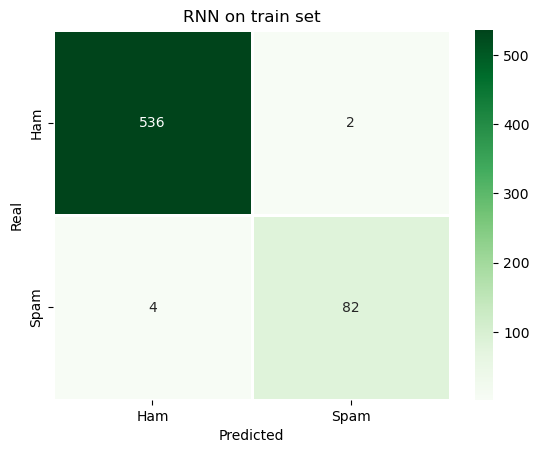

5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         Ham       0.98      0.98      0.98       128
        Spam       0.90      0.93      0.92        29

    accuracy                           0.97       157
   macro avg       0.94      0.95      0.95       157
weighted avg       0.97      0.97      0.97       157



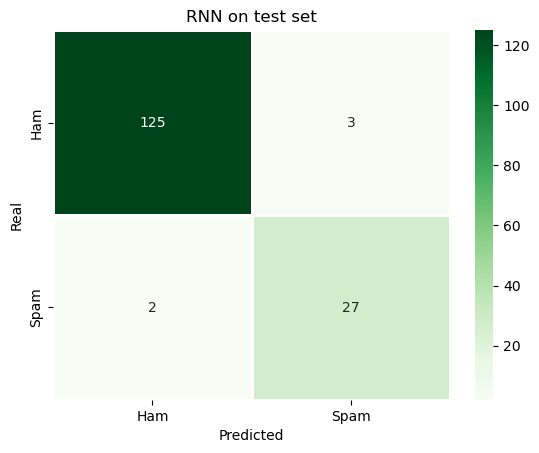

In [235]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes on the train set
y_pred = model.predict(x3_train)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels
print_stats(y_pred_classes, x3_train, y3_train, "RNN on train set")

# Predict classes on the test set
y_pred = model.predict(x3_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels
print_stats(y_pred_classes, x3_test, y3_test, "RNN on test set")

### RNN
#### Theory
https://machinelearningmastery.com/calculus-in-action-neural-networks/<br/>
https://machinelearningmastery.com/an-introduction-to-recurrent-neural-networks-and-the-math-that-powers-them<br/>
https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/<br/>
https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
#### Tutorials
https://victorzhou.com/blog/keras-rnn-tutorial/
#### Documentation
https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization<br/>
https://keras.io/api/optimizers/

In [222]:
# Add an extra dimension to input sequences, required for RNN and LSTM
x3_train_expanded = np.expand_dims(x3_train, axis=1)
x3_test_expanded = np.expand_dims(x3_test, axis=1)

In [230]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

model = Sequential([
        SimpleRNN(units=64, return_sequences=True, input_shape=(x3_train_expanded.shape[1], x3_train_expanded.shape[2])),
        Dropout(0.2),
        SimpleRNN(units=32, return_sequences=False),
        Dropout(0.2),
        Dense(units=1, activation='sigmoid')
    ], name="rnn_model")

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(x3_train_expanded, y3_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
9/9 [==============================] - 3s 54ms/step - loss: 0.5631 - accuracy: 0.7130 - val_loss: 0.4247 - val_accuracy: 0.8413
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 0.4058 - accuracy: 0.7950 - val_loss: 0.3597 - val_accuracy: 0.8254
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 0.3286 - accuracy: 0.8592 - val_loss: 0.3172 - val_accuracy: 0.8413
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 0.2970 - accuracy: 0.8806 - val_loss: 0.2679 - val_accuracy: 0.8889
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 0.2391 - accuracy: 0.9162 - val_loss: 0.2291 - val_accuracy: 0.8889
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 0.2037 - accuracy: 0.9234 - val_loss: 0.1981 - val_accuracy: 0.9365
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 0.1752 - accuracy: 0.9501 - val_loss: 0.1734 - val_accuracy: 0.9524
Epoch 8/10
9/9 [=================

20/20 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         Ham       1.00      0.99      0.99       538
        Spam       0.93      1.00      0.97        86

    accuracy                           0.99       624
   macro avg       0.97      0.99      0.98       624
weighted avg       0.99      0.99      0.99       624



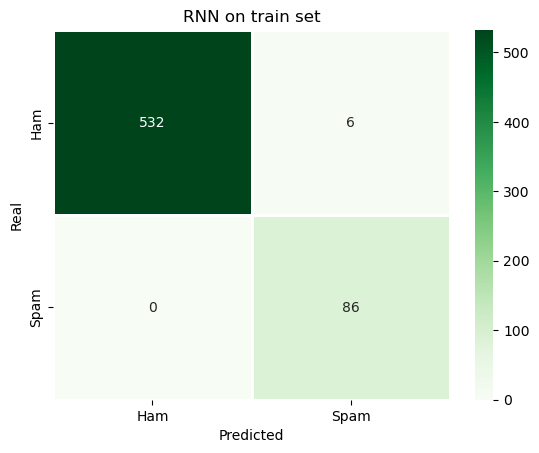

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         Ham       1.00      0.91      0.96       128
        Spam       0.72      1.00      0.84        29

    accuracy                           0.93       157
   macro avg       0.86      0.96      0.90       157
weighted avg       0.95      0.93      0.93       157



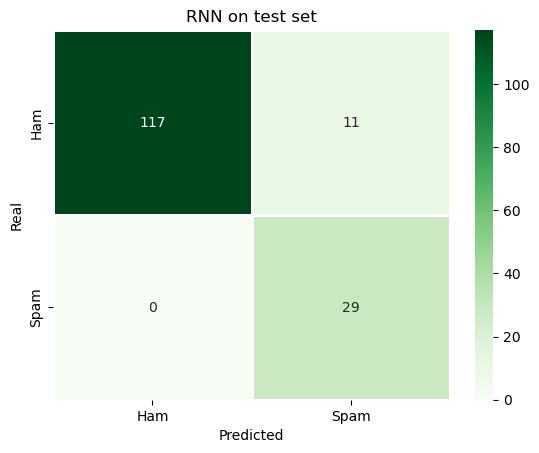

In [231]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes on the train set
y_pred = model.predict(x3_train_expanded)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels
print_stats(y_pred_classes, x3_train_expanded, y3_train, "RNN on train set")

# Predict classes on the test set
y_pred = model.predict(x3_test_expanded)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels
print_stats(y_pred_classes, x3_test_expanded, y3_test, "RNN on test set")

### LSTM

In [232]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
        LSTM(units=64, return_sequences=True, input_shape=(x3_train_expanded.shape[1], x3_train_expanded.shape[2])),
        Dropout(0.2),
        LSTM(units=32, return_sequences=False),
        Dropout(0.2),
        Dense(units=1, activation='sigmoid')
    ], name="lstm_model")

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(x3_train_expanded, y3_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
9/9 [==============================] - 5s 128ms/step - loss: 0.6637 - accuracy: 0.7790 - val_loss: 0.6194 - val_accuracy: 0.9524
Epoch 2/10
9/9 [==============================] - 0s 10ms/step - loss: 0.5748 - accuracy: 0.9608 - val_loss: 0.5116 - val_accuracy: 0.9841
Epoch 3/10
9/9 [==============================] - 0s 10ms/step - loss: 0.4537 - accuracy: 0.9750 - val_loss: 0.3854 - val_accuracy: 0.9524
Epoch 4/10
9/9 [==============================] - 0s 10ms/step - loss: 0.3283 - accuracy: 0.9840 - val_loss: 0.2747 - val_accuracy: 0.9524
Epoch 5/10
9/9 [==============================] - 0s 9ms/step - loss: 0.2311 - accuracy: 0.9875 - val_loss: 0.2004 - val_accuracy: 0.9524
Epoch 6/10
9/9 [==============================] - 0s 10ms/step - loss: 0.1612 - accuracy: 0.9875 - val_loss: 0.1589 - val_accuracy: 0.9524
Epoch 7/10
9/9 [==============================] - 0s 10ms/step - loss: 0.1219 - accuracy: 0.9929 - val_loss: 0.1364 - val_accuracy: 0.9524
Epoch 8/10
9/9 [===========

20/20 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

         Ham       1.00      1.00      1.00       538
        Spam       1.00      0.98      0.99        86

    accuracy                           1.00       624
   macro avg       1.00      0.99      0.99       624
weighted avg       1.00      1.00      1.00       624



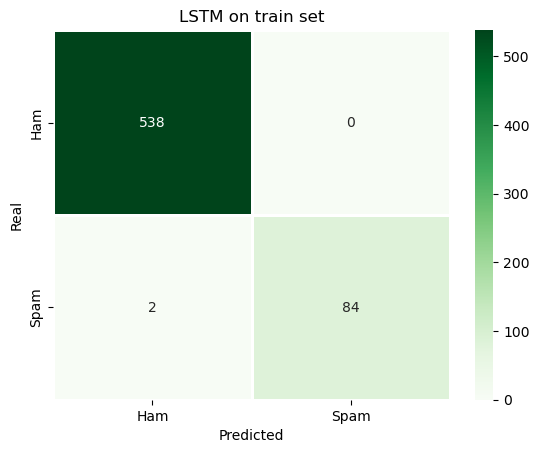

5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         Ham       0.98      0.98      0.98       128
        Spam       0.90      0.93      0.92        29

    accuracy                           0.97       157
   macro avg       0.94      0.95      0.95       157
weighted avg       0.97      0.97      0.97       157



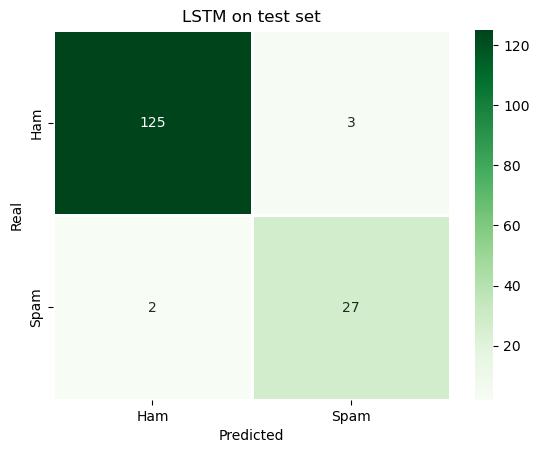

In [233]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes on the train set
y_pred = model.predict(x3_train_expanded)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels
print_stats(y_pred_classes, x3_train_expanded, y3_train, "LSTM on train set")

# Predict classes on the test set
y_pred = model.predict(x3_test_expanded)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels
print_stats(y_pred_classes, x3_test_expanded, y3_test, "LSTM on test set")

## Unsupervised Learning
OpenAI:
> While unsupervised deep learning algorithms can help learn useful representations of the data, they typically need to be combined with a supervised classifier or clustering algorithm to perform the actual spam detection. For instance, you could use an autoencoder to learn a low-dimensional representation of the email data and then train a supervised classifier (e.g., logistic regression, SVM) on the extracted features to classify emails as spam or ham.

### Autoencoder
https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798

In [244]:
import tensorflow as tf
from tensorflow.keras import layers, losses

X_train,X_valid,Y_train,Y_valid = train_test_split(x3_train, y3_train, random_state=42, test_size=0.2)

# Keep only the normal data for the training dataset
X_train_normal = X_train[Y_train == 0]
X_valid_normal = X_valid[Y_valid == 0]

# Input layer
input = tf.keras.layers.Input(shape=(x3_train.shape[1],))

# Encoder layers
encoder = Sequential([
    layers.Dense(256, activation='relu'),  
    layers.Dense(128, activation='relu'),  
    layers.Dense(64, activation='relu'),  
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu')])(input)

# Decoder layers
decoder = tf.keras.Sequential([
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(300, activation="sigmoid")])(encoder)

# Create the autoencoder
autoencoder = tf.keras.Model(inputs=input, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mae')
history = autoencoder.fit(X_train_normal, X_train_normal, 
                          epochs=20, 
                          batch_size=256,
                          validation_data=(X_valid_normal, X_valid_normal),
                          shuffle=True)

Epoch 1/20
2/2 [==============================] - 3s 251ms/step - loss: 0.8079 - val_loss: 0.8194
Epoch 2/20
2/2 [==============================] - 0s 43ms/step - loss: 0.8075 - val_loss: 0.8189
Epoch 3/20
2/2 [==============================] - 0s 42ms/step - loss: 0.8069 - val_loss: 0.8179
Epoch 4/20
2/2 [==============================] - 0s 42ms/step - loss: 0.8058 - val_loss: 0.8160
Epoch 5/20
2/2 [==============================] - 0s 42ms/step - loss: 0.8036 - val_loss: 0.8123
Epoch 6/20
2/2 [==============================] - 0s 46ms/step - loss: 0.7991 - val_loss: 0.8050
Epoch 7/20
2/2 [==============================] - 0s 43ms/step - loss: 0.7905 - val_loss: 0.7915
Epoch 8/20
2/2 [==============================] - 0s 42ms/step - loss: 0.7750 - val_loss: 0.7697
Epoch 9/20
2/2 [==============================] - 0s 43ms/step - loss: 0.7514 - val_loss: 0.7441
Epoch 10/20
2/2 [==============================] - 0s 44ms/step - loss: 0.7254 - val_loss: 0.7268
Epoch 11/20
2/2 [===========

20/20 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         Ham       0.95      0.90      0.92       538
        Spam       0.53      0.67      0.59        86

    accuracy                           0.87       624
   macro avg       0.74      0.79      0.76       624
weighted avg       0.89      0.87      0.88       624



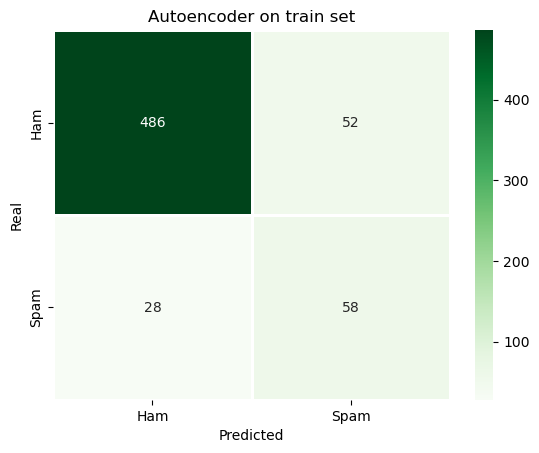

5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         Ham       0.91      0.88      0.90       128
        Spam       0.55      0.62      0.58        29

    accuracy                           0.83       157
   macro avg       0.73      0.75      0.74       157
weighted avg       0.84      0.83      0.84       157



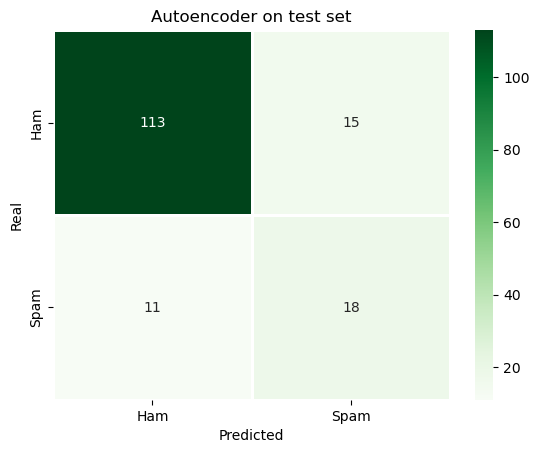

In [252]:
# Calculate MAE loss for validation data
valid_predictions = autoencoder.predict(X_valid_normal)
valid_loss = np.mean(np.abs(valid_predictions - X_valid_normal), axis=1)
threshold = np.percentile(valid_loss, 92)

# Detect anomalies in the train set
train_predictions = autoencoder.predict(x3_train)
train_loss = np.mean(np.abs(train_predictions - x3_train), axis=1)
train_loss = train_loss.reshape((-1))
predictions = np.array([1 if loss > threshold else 0 for loss in train_loss])
print_stats(predictions, x3_train, y3_train, "Autoencoder on train set")

# Detect anomalies in the test set
test_predictions = autoencoder.predict(x3_test)
test_loss = np.mean(np.abs(test_predictions - x3_test), axis=1)
test_loss = test_loss.reshape((-1))
predictions = np.array([1 if loss > threshold else 0 for loss in test_loss])
print_stats(predictions, x3_test, y3_test, "Autoencoder on test set")